# 0. Introdução

<b>Descrição do projeto:</b><br>
Neste projeto,serão tratados e analisados os dados de uma empresa "tal" disponibilizados no site www.kaggle.com,<br> de modo que pode-se encontrar padrões e critérios responsaveis pelo alto numero de atritos e demissões decorrentes na empresa.



Lista de perguntas que devem ser respondidas:
- Por que os funcionarios estão deixando a empresa? 
- Há diferença de tratamento recebido entre homens e mulheres dentro da empresa ?
- Há possibilidades de crescimento dentro da empresa ?
- A diferença salarial dos funcionarios é um problema dentro da empresa ?
- Os diferentes setores da empresa são bem valorizados ?


# 1. Carregando bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 2. Carregando dataset

Primeira olhada no dataset e possiveis colunas relevantes para a analise.

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 3. Tratamento de dados

In [4]:
objetos = df.select_dtypes(include='object')
df.info()
print('\n')
print('Colunas qualitativas: \n') 
objetos.info()
print('\nQnt de valores nulos: ',df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
agrupados = []
nomesAgrupados = []
for col in df:
    if df[col].dtype=='object':
        agrupado = df.groupby(col).size()
        nomesAgrupados.append(col)
        agrupados.append(agrupado)
agrupados

[Attrition
 No     1233
 Yes     237
 dtype: int64,
 BusinessTravel
 Non-Travel            150
 Travel_Frequently     277
 Travel_Rarely        1043
 dtype: int64,
 Department
 Human Resources            63
 Research & Development    961
 Sales                     446
 dtype: int64,
 EducationField
 Human Resources      27
 Life Sciences       606
 Marketing           159
 Medical             464
 Other                82
 Technical Degree    132
 dtype: int64,
 Gender
 Female    588
 Male      882
 dtype: int64,
 JobRole
 Healthcare Representative    131
 Human Resources               52
 Laboratory Technician        259
 Manager                      102
 Manufacturing Director       145
 Research Director             80
 Research Scientist           292
 Sales Executive              326
 Sales Representative          83
 dtype: int64,
 MaritalStatus
 Divorced    327
 Married     673
 Single      470
 dtype: int64,
 Over18
 Y    1470
 dtype: int64,
 OverTime
 No     1054
 Yes     416
 

<b><i>nota: tratamento de dados realizado com facilidade pois os dados estavam sem erros.</i></b>

# 4. Analise por coluna (Univariada)

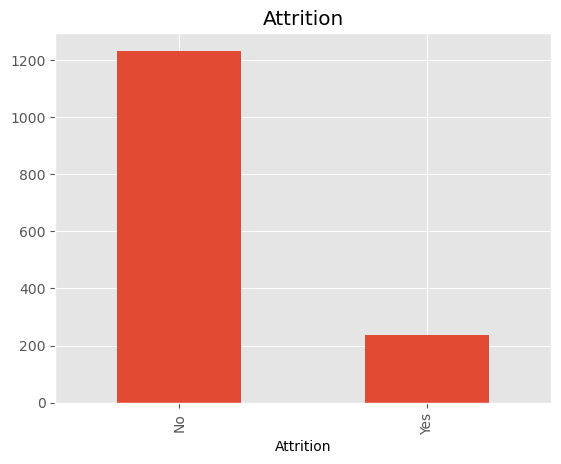

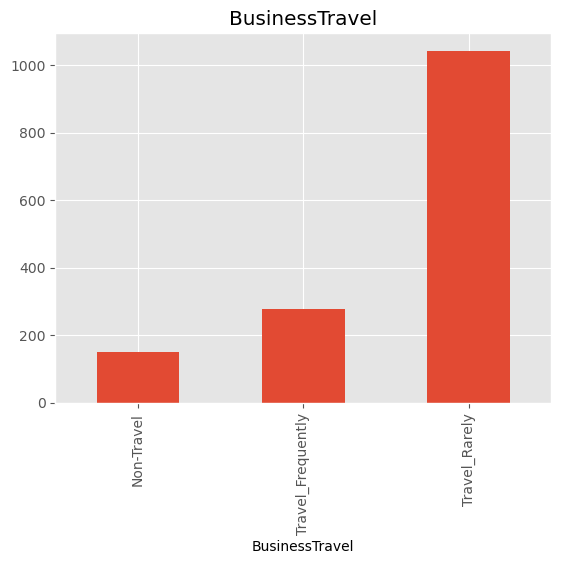

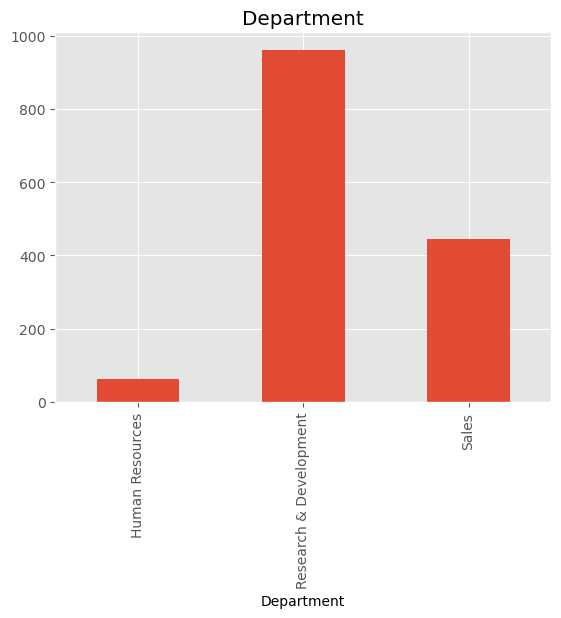

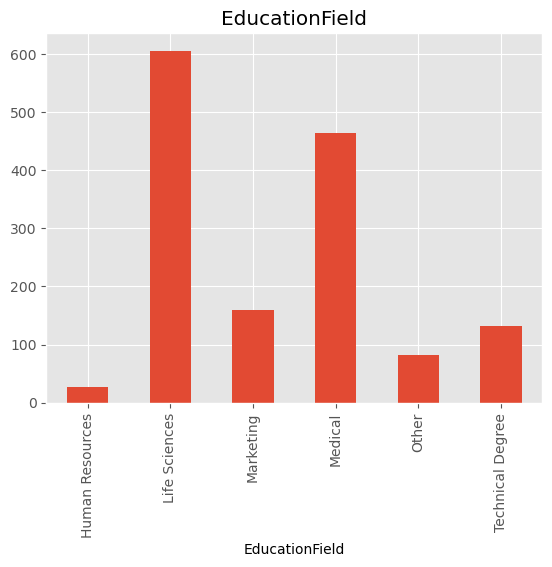

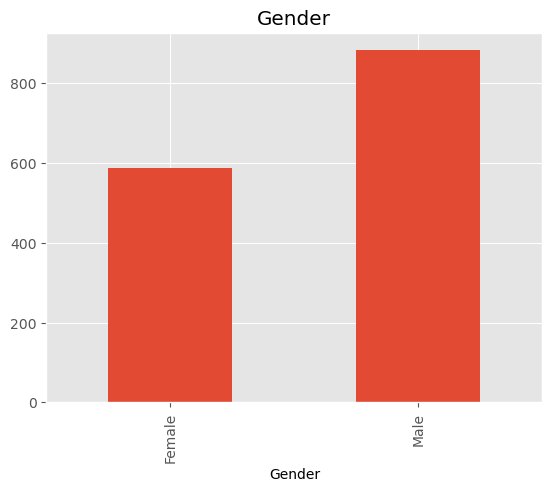

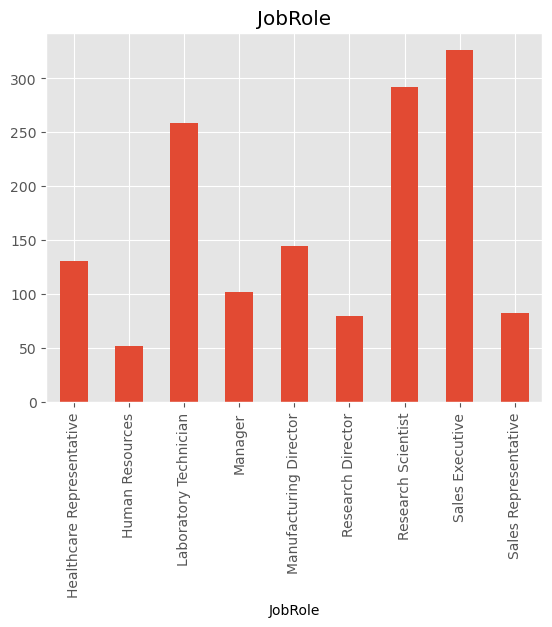

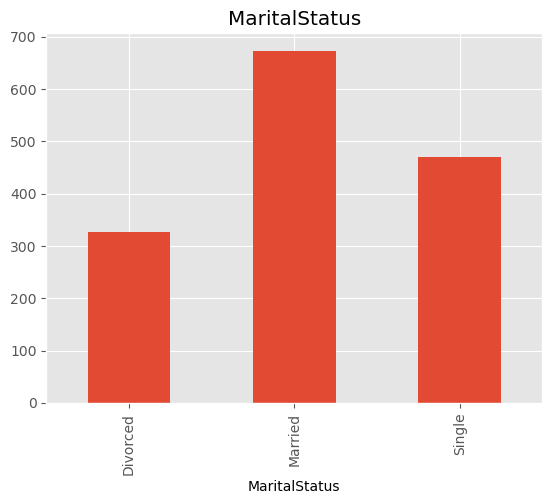

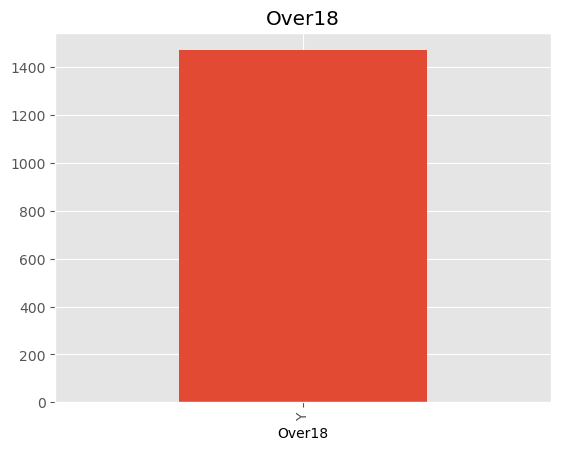

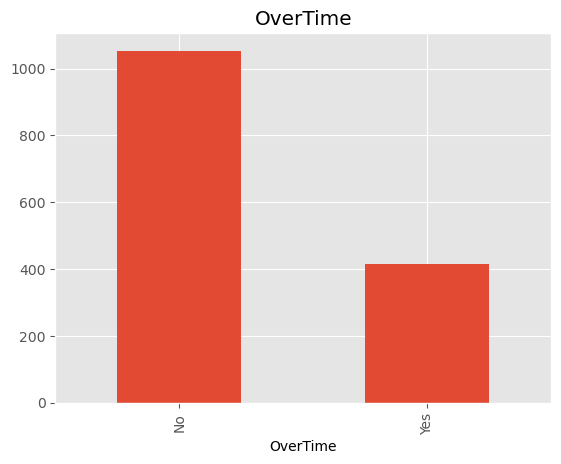

In [7]:
#estrutura de repeticao para apresentar os graficos dos dados qualitativos de maneira mais eficaz e agil
for x in range(len(agrupados)):
    # plt.hist(agrupados[x]) o grafico de histograma não é adequado para apresentar esses tipos de dados(qualitativos).
    plt.title(nomesAgrupados[x])
    agrupados[x].plot.bar()
    plt.show()

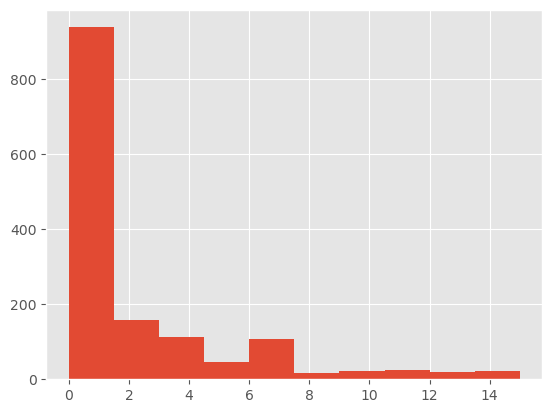

In [8]:
# analise das outras colunas:
_ = plt.hist(df['YearsSinceLastPromotion'])

# 5. Analise bivariada

In [9]:
df.corr(numeric_only=True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


- Há diferença de tratamento recebido entre homens e mulheres dentro da empresa ? <br>resposta foi <b>NÃO</b>, as mulheres não são tratadas de maneira diferente dos homens dentro da empresa, a relação de salario e satisfação com o trabalho é bem parecido, porem os homens recebem promoções com mais frequencia do que as mulheres.

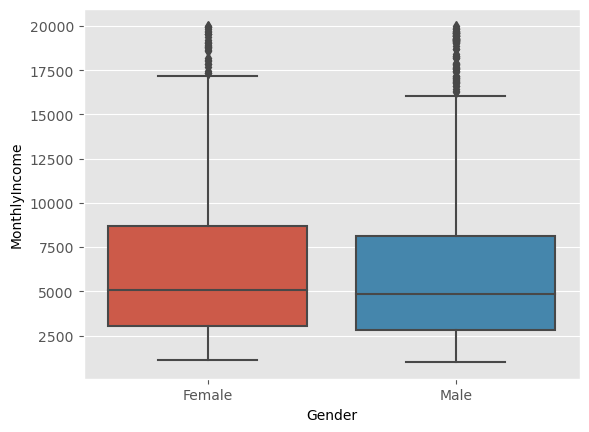

In [10]:
_ = sns.boxplot(x='Gender', y= 'MonthlyIncome', data=df)

A divisao salarial por genero não parece tão grande quanto o esperado

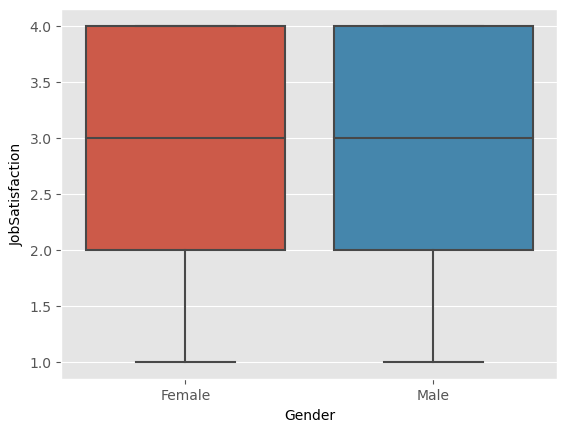

In [11]:
_ = sns.boxplot(x='Gender',y='JobSatisfaction',data=df)

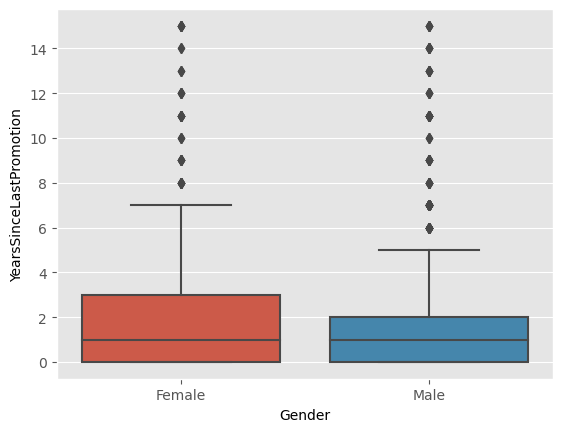

In [12]:
_ = sns.boxplot(x='Gender',y='YearsSinceLastPromotion',data=df)

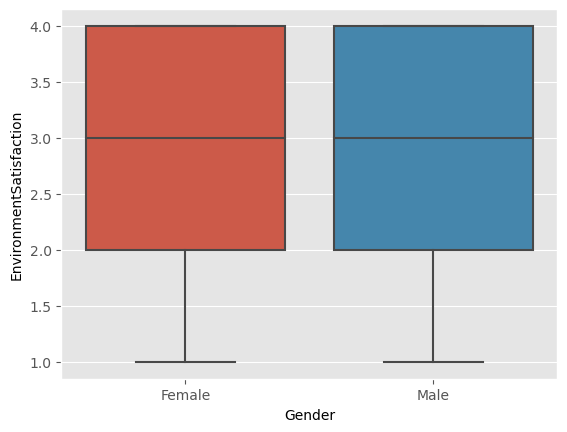

In [13]:
_ = sns.boxplot(x='Gender',y='EnvironmentSatisfaction',data=df)

- Há possibilidades de crescimento dentro da empresa ?<br>
A resposta foi que <b>SIM</b>, existe a possibilidade de crescimento na empresa, e varios funcionarios receberam promoções no ultimo ano. Porem não há relação entre o nivel de trabalho do funcionario com o tempo que ele está na empresa, o que faz com que essa possibilidade seja bem pouca.

YearsSinceLastPromotion
0     581
1     357
2     159
3      52
4      61
5      45
6      32
7      76
8      18
9      17
10      6
11     24
12     10
13     10
14      9
15     13
dtype: int64

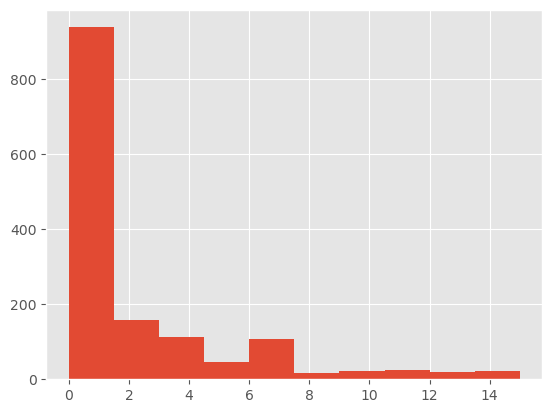

In [14]:
_ = plt.hist(df['YearsSinceLastPromotion'])
i = df.groupby('YearsSinceLastPromotion').size()
i

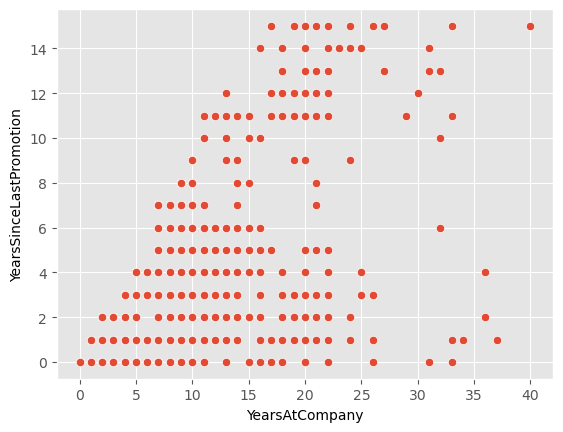

In [15]:
_ = sns.scatterplot(x='YearsAtCompany', y='YearsSinceLastPromotion', data=df)

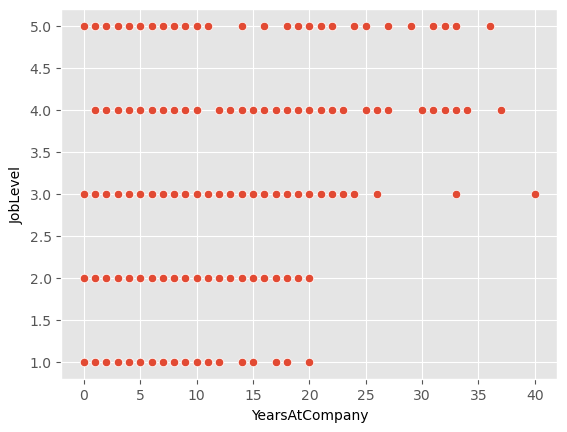

In [16]:
_ = sns.scatterplot(x='YearsAtCompany',y='JobLevel',data=df)

- A diferença salarial dos funcionarios é um problema dentro da empresa ?<br> A resposta é <b>NÃO</b>, os salarios e diferenças salariais não são um problema na empresa, e não tem relação com a satisfação dos funcionarios.

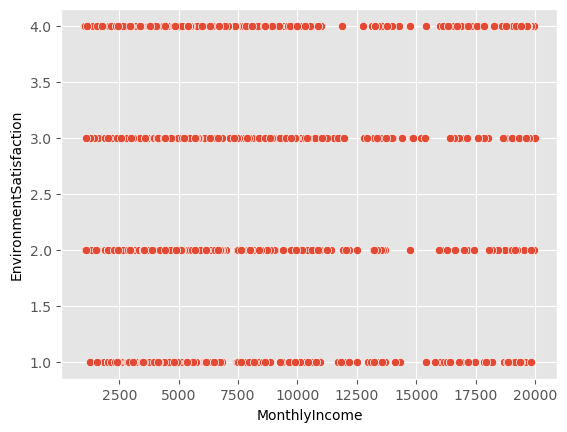

In [17]:
_ = sns.scatterplot(x='MonthlyIncome',y='EnvironmentSatisfaction',data=df)

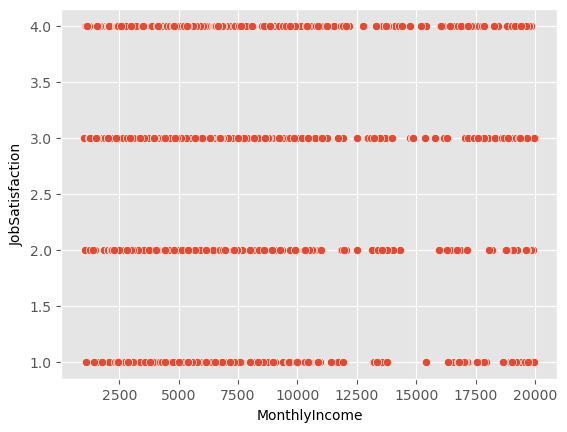

In [18]:
_ = sns.scatterplot(x='MonthlyIncome',y='JobSatisfaction',data=df)

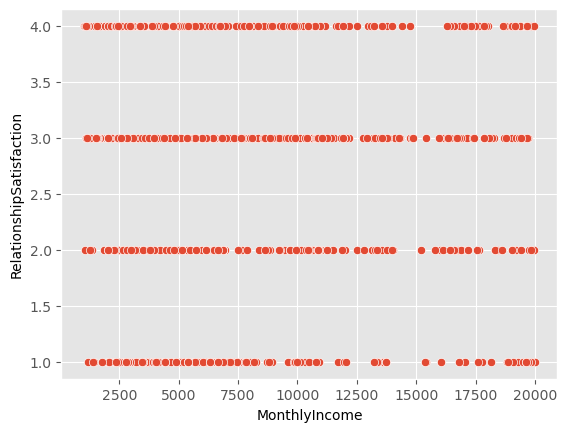

In [19]:
_= sns.scatterplot(x='MonthlyIncome',y='RelationshipSatisfaction',data=df)

- Os diferentes setores da empresa são bem valorizados ?<br> A resposta é <b>SIM</b>, os diferentes setores são bem valorizados e não tem grande distinção de salario entre eles.


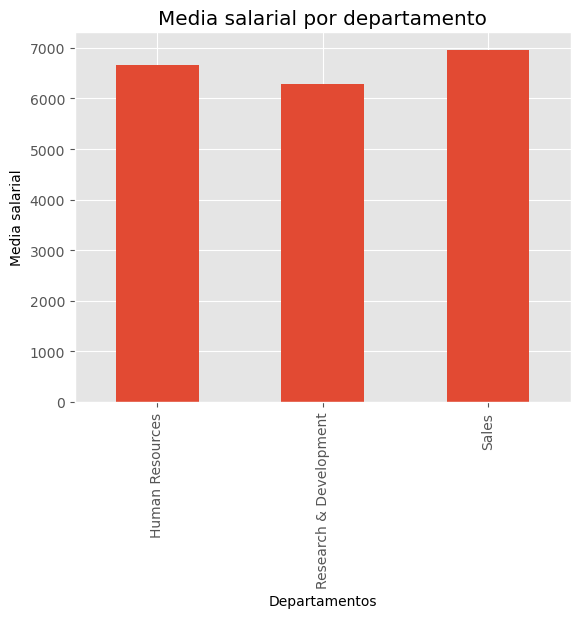

In [20]:
grup_set = df['MonthlyIncome'].groupby(df['Department']).mean()

grup_set.plot(kind='bar')
plt.xlabel('Departamentos')
plt.ylabel('Media salarial')
plt.title('Media salarial por departamento')

plt.show()


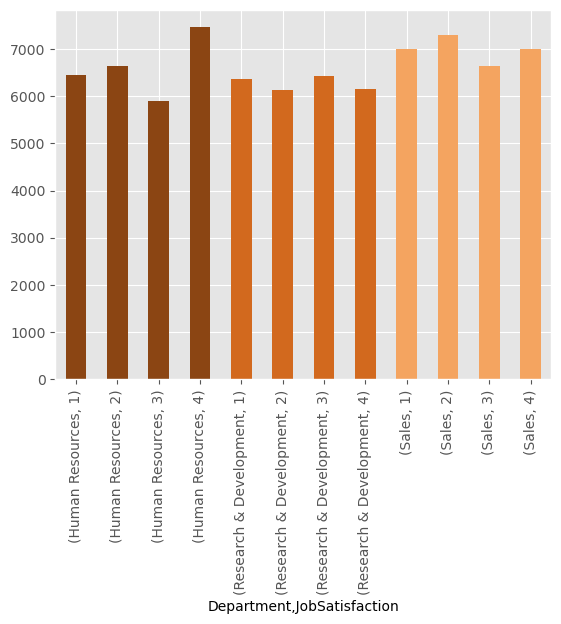

In [108]:
cores = {'Sales': 'SandyBrown', 'Human Resources': 'SaddleBrown', 'Research & Development': 'Chocolate'}

grupos = df.groupby(['Department', 'JobSatisfaction'])['MonthlyIncome'].mean()

grupos.plot(kind='bar', color=[cores[dep] for dep in grupos.index.get_level_values('Department')])

plt.show()

# 6. Analise focada na resposta da pergunta 1:<br>porque os funcionarios estão deixando a empresa?<br>

- A resposta é que não existe um unico motivo que faz os funcionarios deixar a empresa, mas quanto MENOR o:<br>total de anos trabalhados,<br> nivel de trabalho,<br>anos com a atual gerencia,<br> salario mensal, <br>idade,<br> maior a chance do funcionario ter atritos e deixar a empresa.¶

In [22]:
df_new = df.copy()
df_new.loc[df_new['Attrition'] == 'No', 'Attrition' ] = 0
df_new.loc[df_new['Attrition'] == 'Yes', 'Attrition'] = 1
df_new['Attrition'] = df_new['Attrition'].astype(int)
# aqui transformamos a coluna attrition para int
#para que possamos analisar a relação com as demais colunas no corr().

In [23]:
# aqui vemos a relação da coluna attrition com as demais colunas e filtramos as relações mais significativas
corr_atritos = df_new.corrwith(df_new['Attrition'], numeric_only=True)
corr_atritos_sig = corr_atritos[(corr_atritos > 0.10) | (corr_atritos< -0.10)]
corr_atritos_sig.nsmallest(5)
#corr_atritos_sig.nlargest(1)

TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
dtype: float64

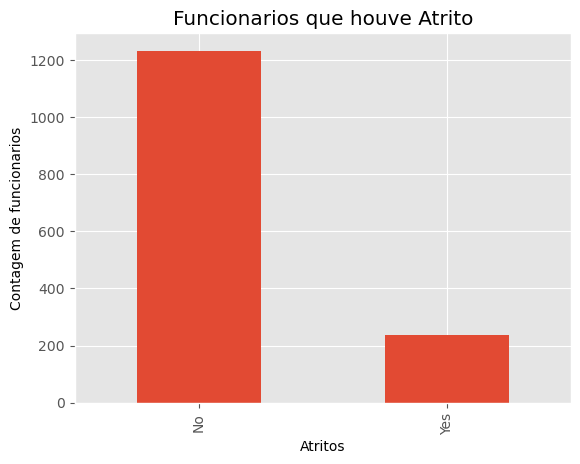

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

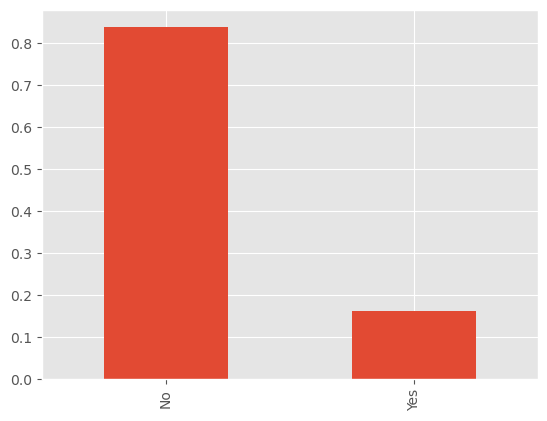

In [24]:
atritos = df.Attrition.value_counts()
porc = df.Attrition.value_counts(1)
atritos.plot(kind = 'bar')
plt.title('Funcionarios que houve Atrito')
plt.xlabel('Atritos')
plt.ylabel('Contagem de funcionarios')
plt.show()
porc.plot.bar()
porc
# Aqui vemos a relação dos funcionarios que ja estiveram em algum atrito na empresa
#E que este número é de 16 porcento.

<Axes: xlabel='Attrition,BusinessTravel'>

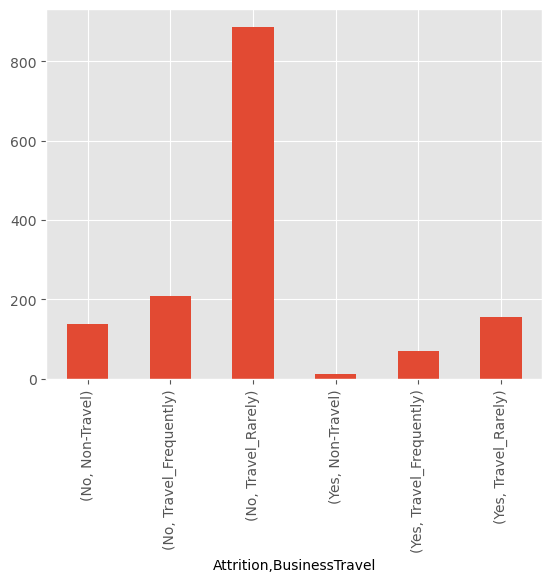

In [25]:
atri = df['Age'].groupby([df['Attrition'], df['BusinessTravel']]).count()
atri.plot.bar()
# Vemos que a maoria dos que TIVERAM atrito viajam raramente,
# mas não tem relacao viajar com ter atrito, pois a maioria que NÃO tiveram atrito tambem foram os que jiajem raramente

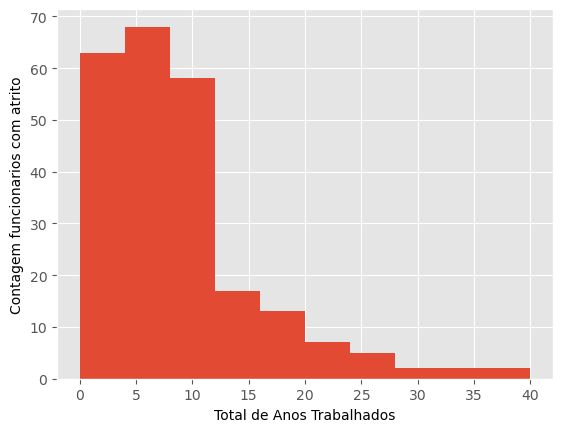

In [100]:
# Nova tabela apenas com os funcionarios com atrito
yes = df_new.loc[df_new['Attrition'] == 1]

plt.hist(yes['TotalWorkingYears'],)
plt.xlabel('Total de Anos Trabalhados')
plt.ylabel('Contagem funcionarios com atrito')
plt.show()

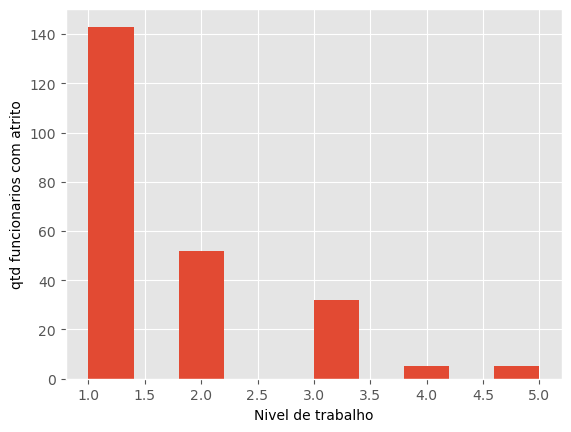

In [99]:
_= plt.hist(yes['JobLevel'])
_= plt.ylabel('qtd funcionarios com atrito')
_= plt.xlabel('Nivel de trabalho')

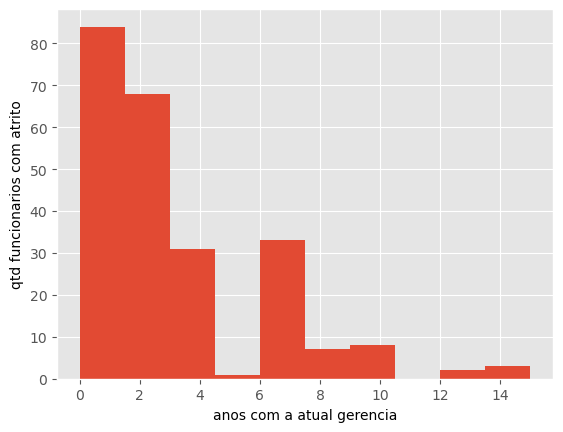

In [95]:
_= plt.hist(yes['YearsInCurrentRole'])
_= plt.xlabel('anos com a atual gerencia')
_= plt.ylabel('qtd funcionarios com atrito')

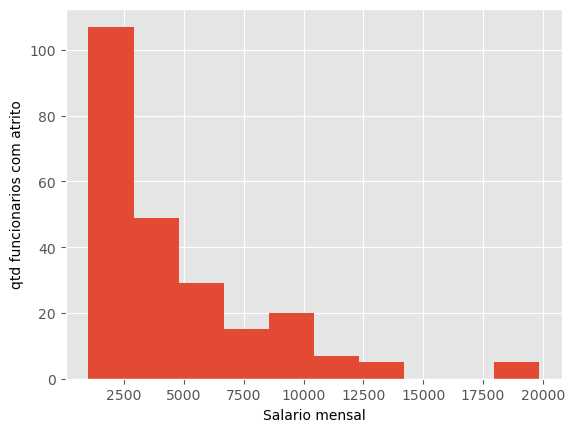

In [98]:
_= plt.hist(yes['MonthlyIncome'])
_= plt.ylabel('qtd funcionarios com atrito')
_= plt.xlabel('Salario mensal')

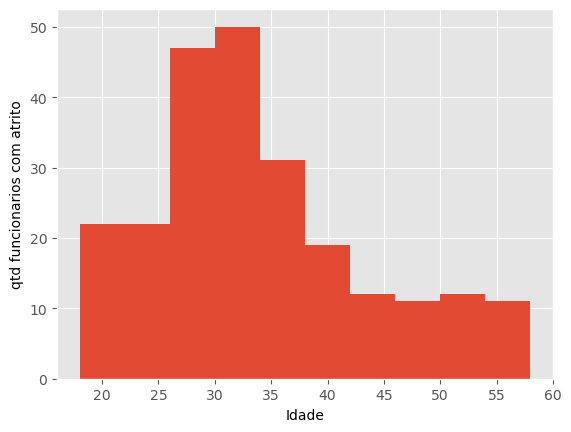

In [97]:
_= plt.hist(yes['Age'])
_= plt.ylabel('qtd funcionarios com atrito')
_= plt.xlabel('Idade')

Vemos que quanto menor o Total de anos trabalhados, nivel de trabalho, anos com a atual gerencia, salario mensal, idade, maior a chance do funcionario ter atritos.<br>
E que os funcionarios com idade entre 26 e 39 anos tem mais chances de entrar em atrito.